In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../../../datasets/digit_recognition/train.csv')
df_test = pd.read_csv('../../../../datasets/digit_recognition/test.csv')
df.shape

(42000, 785)

In [4]:
df.head(5)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X = df.drop('label', axis=1)/255
y = df['label']

In [6]:
X.shape

(42000, 784)

In [7]:
def show_digit(X,index):
    img0 = X.iloc[index].values.reshape(28,28)/255
    plt.imshow(img0)

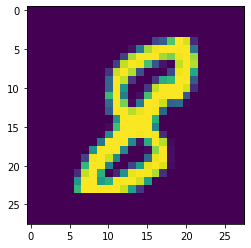

In [8]:
show_digit(X, 512)

In [9]:
df_test.shape

(28000, 784)

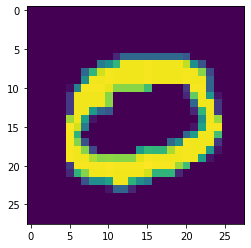

In [10]:
show_digit(df_test, 1)

In [11]:
y

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
y_train = to_categorical(y, num_classes=10)

In [14]:
y_train.shape

(42000, 10)

# Model Bulding

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model = Sequential()
model.add(Dense(50, activation='relu',input_shape=(784,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax')) # Probability

model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 10)                510       
                                                                 
Total params: 42,310
Trainable params: 42,310
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X, y_train, epochs=20, batch_size=64)

Epoch 1/20
657/657 [==============================] - 2s 2ms/step - loss: 0.3839 - accuracy: 0.8920
Epoch 2/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1785 - accuracy: 0.9473
Epoch 3/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1358 - accuracy: 0.9594
Epoch 4/20
657/657 [==============================] - 1s 2ms/step - loss: 0.1117 - accuracy: 0.9666
Epoch 5/20
657/657 [==============================] - 1s 2ms/step - loss: 0.0942 - accuracy: 0.9716
Epoch 6/20
657/657 [==============================] - 1s 2ms/step - loss: 0.0810 - accuracy: 0.9755
Epoch 7/20
657/657 [==============================] - 1s 2ms/step - loss: 0.0703 - accuracy: 0.9783
Epoch 8/20
657/657 [==============================] - 1s 2ms/step - loss: 0.0626 - accuracy: 0.9812
Epoch 9/20
657/657 [==============================] - 1s 2ms/step - loss: 0.0559 - accuracy: 0.9826
Epoch 10/20
657/657 [==============================] - 1s 2ms/step - loss: 0.0504 - accuracy: 0.9844

In [19]:
model.evaluate(X,y_train, batch_size=64)

657/657 [==============================] - 1s 1ms/step - loss: 0.0156 - accuracy: 0.9952


[0.01558175403624773, 0.9952142834663391]

In [45]:
q = df_test.iloc[1].values.reshape(1,784)/255
model.predict_on_batch(q).argmax()

0

In [20]:
def predict_from_dftest(index):
    q = df_test.iloc[index].values.reshape(1,784)/255
    print(model.predict(q).argmax())

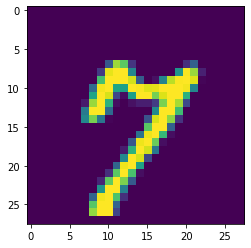

In [21]:
show_digit(df_test,104)

In [22]:
predict_from_dftest(104)

1/1 [==============================] - 0s 75ms/step
7


In [59]:
yp = model.predict(X)

1313/1313 [==============================] - 1s 957us/step


In [65]:
sum(yp.argmax(axis=1) == y)/42000

0.952047619047619

In [21]:
import cv2

In [27]:
img = cv2.imread('../../datasets/digit_recognition/my_images/00.jpg', 0)

In [28]:
img.shape

(33, 38)

In [29]:
type(img)

numpy.ndarray

In [30]:
img = cv2.resize(img, (28,28))/255
img.shape

(28, 28)

In [31]:
model.predict(img.reshape(1,784)).argmax()

1/1 [==============================] - 0s 18ms/step


6

In [22]:
def predict_image(path):
    img = cv2.imread(path, 0)
    img = cv2.resize(img, (28,28))/255
    y = model.predict_on_batch(img.reshape(1,784)).argmax()
    return y

In [36]:
predict_image('../../datasets/digit_recognition/my_images/2.jpg')

1/1 [==============================] - 0s 16ms/step


2

In [23]:
import os

In [26]:
files = os.listdir('../../../../datasets/digit_recognition/my_images')

In [27]:
for file in files:
    y = predict_image('../../../../datasets/digit_recognition/my_images/'+file)
    print(file,'\t\t' ,y)

0.jpg 		 9
00.jpg 		 0
1.jpg 		 2
11.jpg 		 6
2.jpg 		 2
22.jpg 		 2
3.jpg 		 2
33.jpg 		 3
4.jpg 		 4
44.jpg 		 1
5.jpg 		 5
55.jpg 		 5
6.jpg 		 8
66.jpg 		 6
7.jpg 		 2
77.jpg 		 2
8.jpg 		 8
88.jpg 		 5
9.jpg 		 3
99.jpg 		 1


In [ ]:
model.predict_function()